In [1]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import sklearn.metrics
import seaborn as sb
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('./ph-data.csv')

In [3]:
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [4]:
colors = np.array([df.red, df.green, df.blue]).T
colors

array([[231,  27,  36],
       [250,  84,  36],
       [255, 164,  37],
       ...,
       [ 48,  62, 169],
       [ 79,  37, 173],
       [ 77,   2, 131]], dtype=int64)

In [5]:
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [6]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


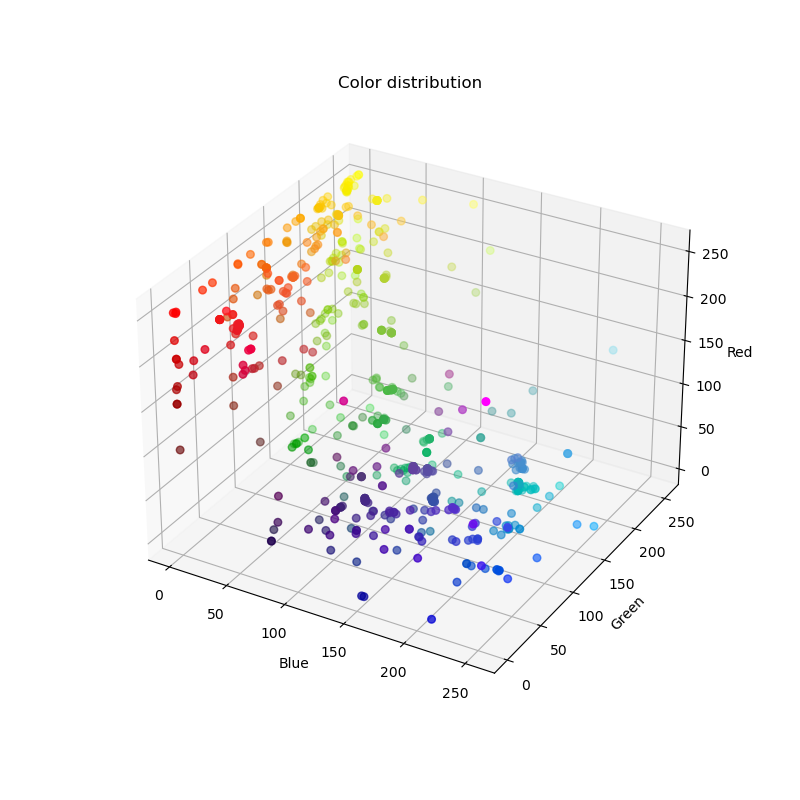

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = df.blue
y = df.green
z = df.red
ax.scatter(x, y, z, c=colors/255.0, s=30)
ax.set_title("Color distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show()

<IPython.core.display.Javascript object>


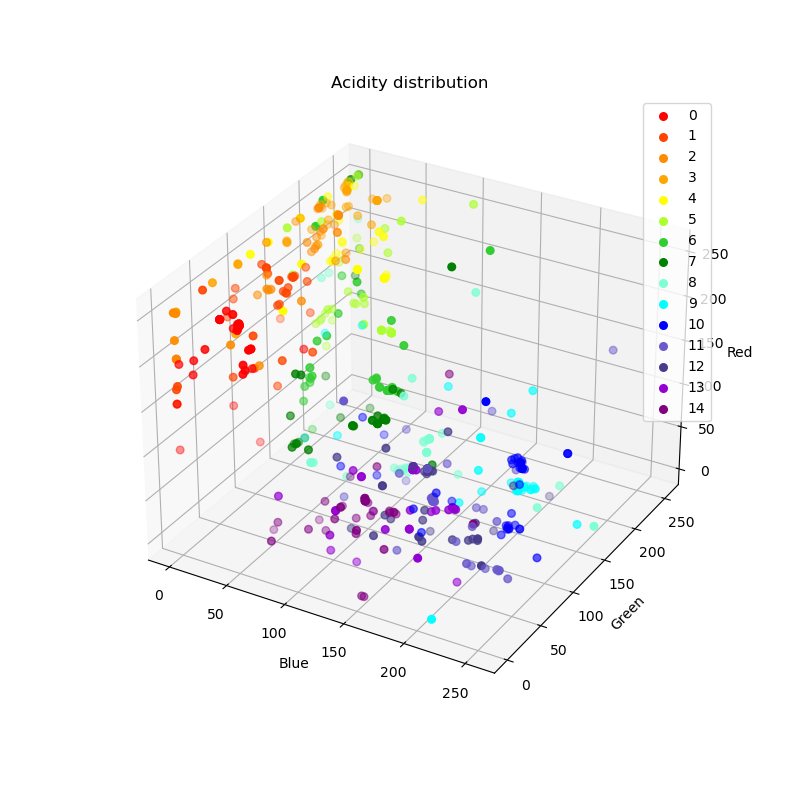

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = range(0, 15)
ph_colors = ['red','orangered', 'darkorange', 'orange', 'yellow', 'greenyellow', 'limegreen', 'green', 'aquamarine', 'aqua', 'blue', 'slateblue', 'darkslateblue', 'darkviolet', 'purple']
for l in labels:
    x = df[df['label'] == l].blue
    y = df[df['label'] == l].green
    z = df[df['label'] == l].red
    ax.scatter(x, y, z, label=l, c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


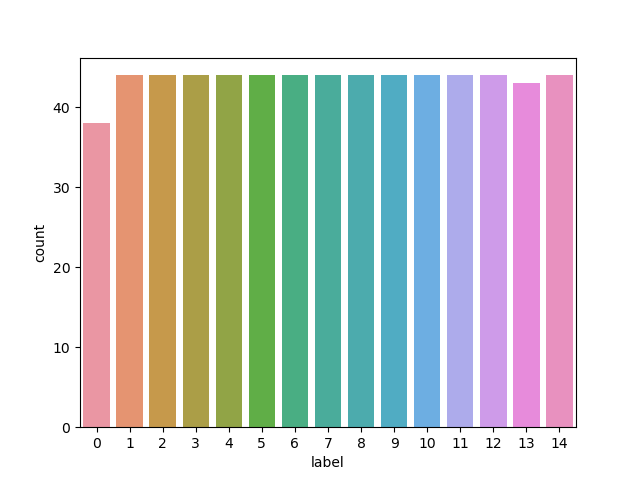

<AxesSubplot:xlabel='label', ylabel='count'>

In [16]:
sb.countplot(x='label', data=df)

In [17]:
df.isnull().sum()

blue     0
green    0
red      0
label    0
dtype: int64

In [18]:
df.shape

(653, 4)

In [19]:
def determine_acidity_3_group(df):
    if df['label'] == 7:
        val = 'neutral'
    elif df['label'] > 7:
        val = 'alkali'
    elif df['label'] < 7:
        val = 'acid'
    return val


def determine_acidity_5_group(df):
    if df['label'] == 7:
        val = 'neutral'
    elif df['label'] > 11:
        val = 'strong_alkali'
    elif df['label'] < 3:
        val = 'strong_acid'
    elif 11 >= df['label'] > 7:
        val = 'alkali'
    elif 3 <= df['label'] < 7:
        val = 'acid'    
    return val

In [20]:
df['acidity_3_group'] = df.apply(determine_acidity_3_group, axis=1)
df['acidity_5_group'] = df.apply(determine_acidity_5_group, axis=1)

In [21]:
df.head()

,blue,green,red,label,acidity_3_group,acidity_5_group
0,36,27,231,0,acid,strong_acid
1,36,84,250,1,acid,strong_acid
2,37,164,255,2,acid,strong_acid
3,22,205,255,3,acid,acid
4,38,223,221,4,acid,acid


<IPython.core.display.Javascript object>


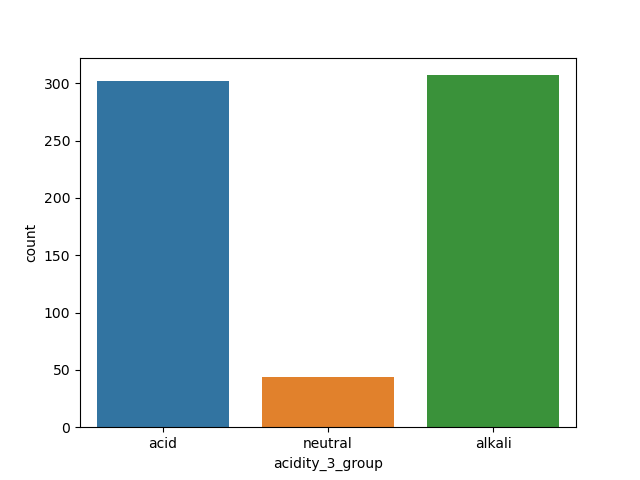

<AxesSubplot:xlabel='acidity_3_group', ylabel='count'>

In [22]:
sb.countplot(x='acidity_3_group', data=df)

<IPython.core.display.Javascript object>


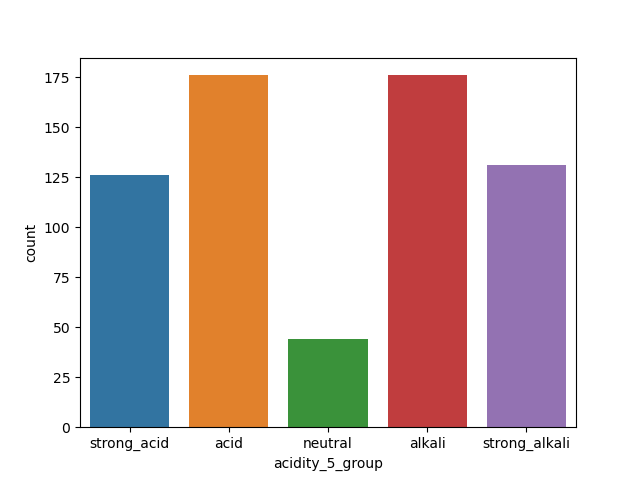

<AxesSubplot:xlabel='acidity_5_group', ylabel='count'>

In [24]:
sb.countplot(x='acidity_5_group', data=df)

<IPython.core.display.Javascript object>


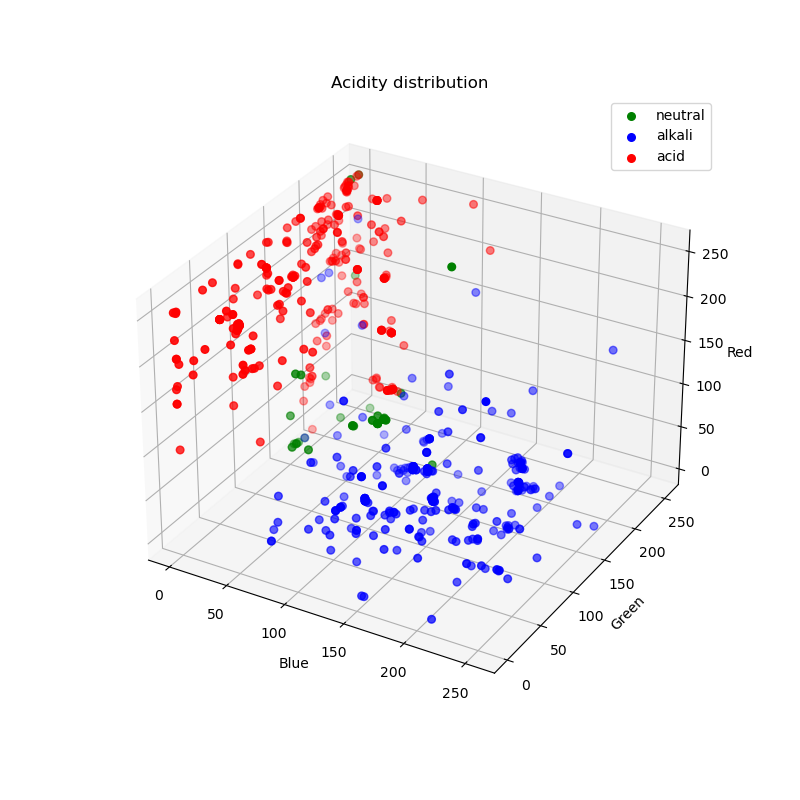

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = ['neutral', 'alkali', 'acid']
ph_colors = ['green','blue', 'red']
for l in range(0, 3):
    x = df[df['acidity_3_group'] == labels[l]].blue
    y = df[df['acidity_3_group'] == labels[l]].green
    z = df[df['acidity_3_group'] == labels[l]].red
    ax.scatter(x, y, z, label=labels[l], c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


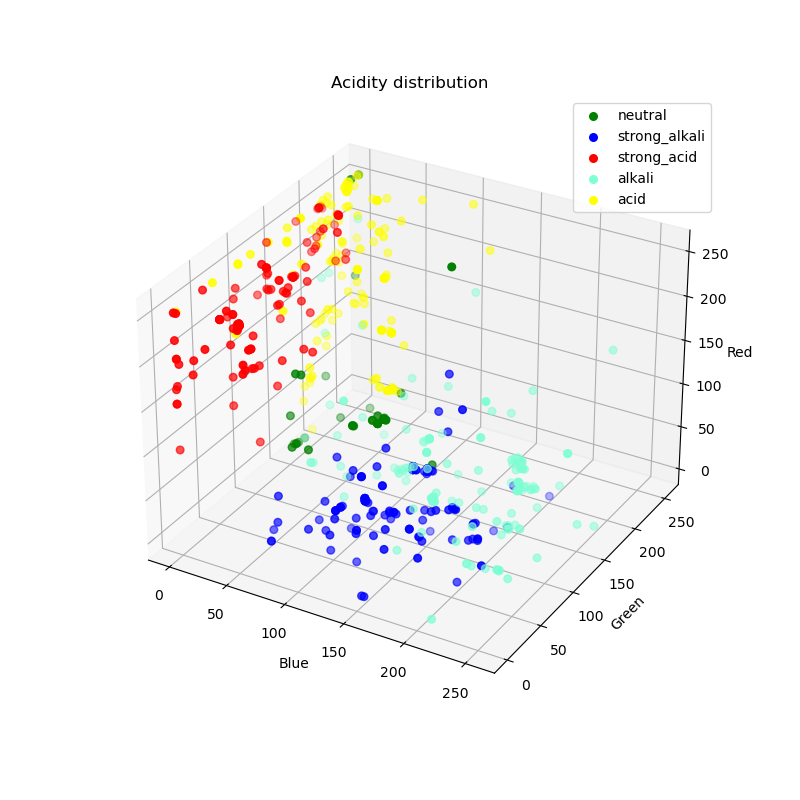

In [26]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = ['neutral', 'strong_alkali', 'strong_acid', 'alkali', 'acid']
ph_colors = ['green','blue', 'red', 'aquamarine', 'yellow']
for l in range(0, 5):
    x = df[df['acidity_5_group'] == labels[l]].blue
    y = df[df['acidity_5_group'] == labels[l]].green
    z = df[df['acidity_5_group'] == labels[l]].red
    ax.scatter(x, y, z, label=labels[l], c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

In [27]:
df_result_1 = df['label']
df_result_2 = df['acidity_3_group']
df_result_3 = df['acidity_5_group']
df_inputs = df.drop(['label', 'acidity_3_group', 'acidity_5_group'], axis=1)

In [28]:
X_train, X_test, y_train_1, y_test_1 = train_test_split(df_inputs, df_result_1, test_size=0.25, random_state=1)

In [96]:
y_train_2 = df['acidity_3_group'].iloc[y_train_1.index]
y_train_3 = df['acidity_5_group'].iloc[y_train_1.index]
y_test_2 = df['acidity_3_group'].iloc[y_test_1.index]
y_test_3 = df['acidity_5_group'].iloc[y_test_1.index]

In [30]:
y_train_1

362     5
491     2
259     5
630     7
40     10
       ..
144    10
645     7
72     12
235    11
37      7
Name: label, Length: 489, dtype: int64

<IPython.core.display.Javascript object>


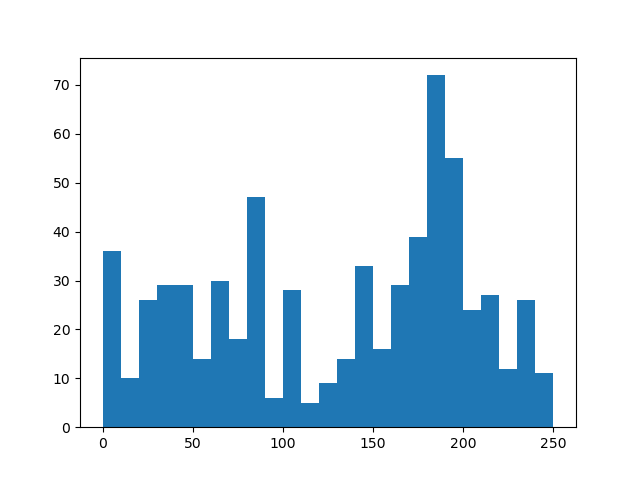

In [31]:
plt.hist(df.green, bins=range(min(df.green), max(df.green), 10))
plt.show()

<IPython.core.display.Javascript object>


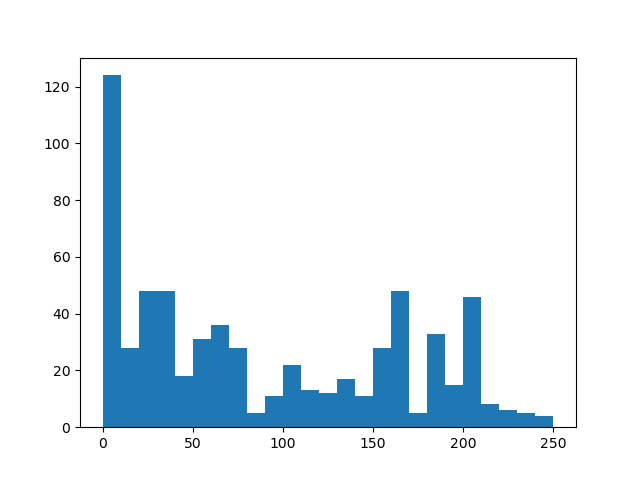

In [33]:
plt.hist(df.blue, bins=range(min(df.blue), max(df.blue), 10))
plt.show()

In [93]:
#My classifications: Linear Regression, Logistic Regression, Random Forests, KNN, Gradient Boosting

In [34]:
import random
random.seed(0)

In [36]:
def best_model(X_train, y_train):
    
    param_distribution_log_reg = {'penalty':['l2', 'none'], 'fit_intercept':[True,False], 'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
    param_distribution_KNN = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
    param_distribution_rand_forests = {'n_estimators': range(5, 20),  'max_depth': range(3, 30)}
    param_distribution_grad_boosting = {'n_estimators': range(5, 20),  'max_depth': range(3, 30)}
        
    if y_train.dtypes == 'int64':
        
        model_log_regression = GridSearchCV(LogisticRegression(), param_distribution_log_reg, scoring='balanced_accuracy', n_jobs=-1)
        model_KNN = GridSearchCV(KNeighborsClassifier(), param_distribution_KNN, scoring='balanced_accuracy', n_jobs=-1)
        model_rand_forests = RandomizedSearchCV(RandomForestClassifier(), param_distribution_rand_forests, n_iter=60, scoring='balanced_accuracy', n_jobs=-1, random_state=1)
        model_grad_boosting = RandomizedSearchCV(GradientBoostingClassifier(), param_distribution_grad_boosting, n_iter=60, scoring='balanced_accuracy', n_jobs=-1, random_state=1)
        
        model_log_regression.fit(X_train, y_train)
        model_KNN.fit(X_train, y_train)
        model_rand_forests.fit(X_train, y_train)
        model_grad_boosting.fit(X_train, y_train)
        
        result = pd.DataFrame({'Score': [model_log_regression.best_score_, model_KNN.best_score_, model_rand_forests.best_score_, model_grad_boosting.best_score_],
                               'Parameters': [model_log_regression.best_params_, model_KNN.best_params_, model_rand_forests.best_params_, model_grad_boosting.best_params_]}, 
                              index=['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'])
        
    elif y_train.dtypes == 'object':
        
        model_log_regression = GridSearchCV(LogisticRegression(), param_distribution_log_reg, scoring='balanced_accuracy', n_jobs=-1)
        model_KNN = GridSearchCV(KNeighborsClassifier(), param_distribution_KNN, scoring='balanced_accuracy', n_jobs=-1)
        model_rand_forests = GridSearchCV(RandomForestClassifier(), param_distribution_rand_forests, scoring='balanced_accuracy', n_jobs=-1)
        model_grad_boosting = GridSearchCV(GradientBoostingClassifier(), param_distribution_grad_boosting, scoring='balanced_accuracy', n_jobs=-1)
        
        model_log_regression.fit(X_train, y_train)
        model_KNN.fit(X_train, y_train)
        model_rand_forests.fit(X_train, y_train)
        model_grad_boosting.fit(X_train, y_train)
        
        result = pd.DataFrame({'Score': [model_log_regression.best_score_, model_KNN.best_score_, model_rand_forests.best_score_, model_grad_boosting.best_score_],
                               'Parameters': [model_log_regression.best_params_, model_KNN.best_params_, model_rand_forests.best_params_, model_grad_boosting.best_params_]}, 
                              index=['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'])
    
    return result

In [37]:
best_model(X_train, y_train_1)

,Score,Parameters
LogisticRegression,0.544968,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.703841,{'algorithm': 'auto'}
RandomForestClassifier,0.752841,"{'n_estimators': 19, 'max_depth': 10}"
GradientBoostingClassifier,0.723619,"{'n_estimators': 11, 'max_depth': 3}"


In [38]:
best_model(X_train, y_train_2)

,Score,Parameters
LogisticRegression,0.807603,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.909655,{'algorithm': 'auto'}
RandomForestClassifier,0.947228,"{'max_depth': 26, 'n_estimators': 13}"
GradientBoostingClassifier,0.910748,"{'max_depth': 3, 'n_estimators': 5}"


In [39]:
best_model(X_train, y_train_3)

,Score,Parameters
LogisticRegression,0.798254,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.878212,{'algorithm': 'auto'}
RandomForestClassifier,0.915925,"{'max_depth': 17, 'n_estimators': 13}"
GradientBoostingClassifier,0.870276,"{'max_depth': 3, 'n_estimators': 11}"


In [40]:
best_model1 = RandomForestClassifier(n_estimators=19, max_depth=10)
best_model2 = RandomForestClassifier(n_estimators=13, max_depth=26)
best_model3 = RandomForestClassifier(n_estimators=13, max_depth=17)

In [41]:
best_model1.fit(X_train, y_train_1)

RandomForestClassifier(max_depth=10, n_estimators=19)

In [101]:
best_model2.fit(X_train, y_train_2)

RandomForestClassifier(max_depth=26, n_estimators=13)

In [43]:
best_model3.fit(X_train, y_train_3)

RandomForestClassifier(max_depth=17, n_estimators=13)

In [44]:
y_pred_1 = best_model1.predict(X_test)

In [45]:
y_pred_2 = best_model2.predict(X_test)

In [46]:
y_pred_3 = best_model3.predict(X_test)

<IPython.core.display.Javascript object>


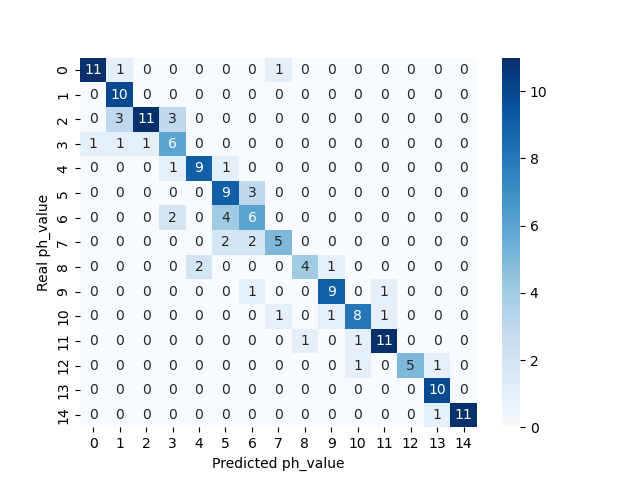

In [47]:
cnf_matrix1 = confusion_matrix(y_test_1, y_pred_1)
sb.heatmap(cnf_matrix1, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Real ph_value')
plt.xlabel('Predicted ph_value')
plt.show()

<IPython.core.display.Javascript object>


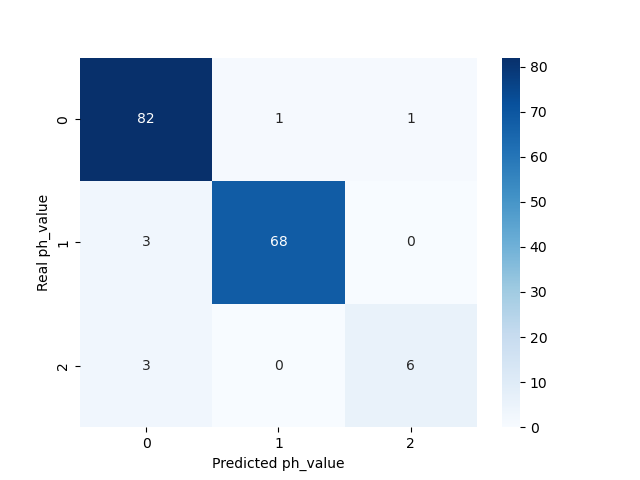

In [102]:
cnf_matrix2 = confusion_matrix(y_test_2, y_pred_2)
sb.heatmap(cnf_matrix2, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Real ph_value')
plt.xlabel('Predicted ph_value')
plt.show()

<IPython.core.display.Javascript object>


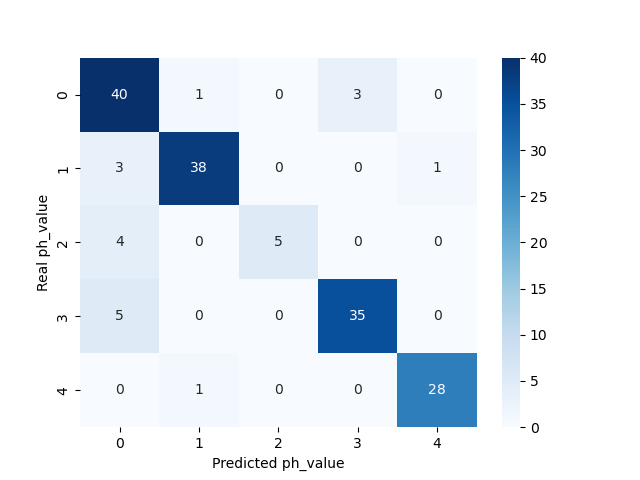

In [49]:
cnf_matrix3 = confusion_matrix(y_test_3, y_pred_3)
sb.heatmap(cnf_matrix3, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Real ph_value')
plt.xlabel('Predicted ph_value')
plt.show()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred_3, target_names=df.acidity_5_group.unique()))

               precision    recall  f1-score   support

  strong_acid       0.77      0.91      0.83        44
         acid       0.95      0.90      0.93        42
      neutral       1.00      0.56      0.71         9
       alkali       0.92      0.88      0.90        40
strong_alkali       0.97      0.97      0.97        29

     accuracy                           0.89       164
    macro avg       0.92      0.84      0.87       164
 weighted avg       0.90      0.89      0.89       164



In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test_2, y_pred_2, target_names=df.acidity_3_group.unique()))

              precision    recall  f1-score   support

        acid       0.93      0.98      0.95        84
     neutral       0.99      0.96      0.97        71
      alkali       0.86      0.67      0.75         9

    accuracy                           0.95       164
   macro avg       0.92      0.87      0.89       164
weighted avg       0.95      0.95      0.95       164



In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.67      1.00      0.80        10
           2       0.92      0.65      0.76        17
           3       0.50      0.67      0.57         9
           4       0.82      0.82      0.82        11
           5       0.56      0.75      0.64        12
           6       0.50      0.50      0.50        12
           7       0.71      0.56      0.63         9
           8       0.80      0.57      0.67         7
           9       0.82      0.82      0.82        11
          10       0.80      0.73      0.76        11
          11       0.85      0.85      0.85        13
          12       1.00      0.71      0.83         7
          13       0.83      1.00      0.91        10
          14       1.00      0.92      0.96        12

    accuracy                           0.76       164
   macro avg       0.78      0.76      0.76       164
weighted avg       0.78   

In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
def roc_auc_score_summary(model, X_test, y_test):
    y_preb_probs = model.predict_proba(X_test)
    roc_auc_score_for_model = round(roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"), 3)
    count_of_classes = len(y_test.unique())
    print('ROC_AUC_score of model with', count_of_classes, 'classes =', roc_auc_score_for_model)
    return 

In [93]:
roc_auc_score_summary(best_model1, X_test, y_test_1)

ROC_AUC_score of model with 15 classes = 0.952


In [94]:
roc_auc_score_summary(best_model3, X_test, y_test_3)

ROC_AUC_score of model with 5 classes = 0.974


In [105]:
roc_auc_score_summary(best_model2, X_test, y_test_2)

ROC_AUC_score of model with 3 classes = 0.978


In [53]:
from sklearn.metrics import roc_auc_score






# Generate class membership probabilities
y_preb_probs_1 = best_model1.predict_proba(X_test)

roc_auc_score(y_test_1, y_preb_probs_1, average="weighted", multi_class="ovr")

0.937371234777793

In [99]:
y_preb_probs_2 = best_model2.predict_proba(X_test)
roc_auc_score(y_test_2, y_preb_probs_2, average="weighted", multi_class="ovr")

ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

In [100]:
y_preb_probs_3 = best_model3.predict_proba(X_test)
roc_auc_score(y_test_3, y_preb_probs_3, average="weighted", multi_class="ovr")

0.9736786318925237

In [61]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [57]:
def roc_curve(acidity, y_test, y_score):
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(acidity.unique().count()):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
 
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure()
    plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return

In [60]:
roc_curve(df.acidity_3_group, y_test_2, best_model2.fit(X_train, y_train_1))

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [ ]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search_lin_reg = GridSearchCV(lin_reg, parameters, cv=None, n_jobs=-1)

In [24]:
grid_search_lin_reg.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [25]:
grid_search_lin_reg.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [26]:
y_pred = grid_search_lin_reg.predict(X_test)

In [27]:
grid_search_lin_reg.score(X_test, y_test)

0.701986064098713

<IPython.core.display.Javascript object>


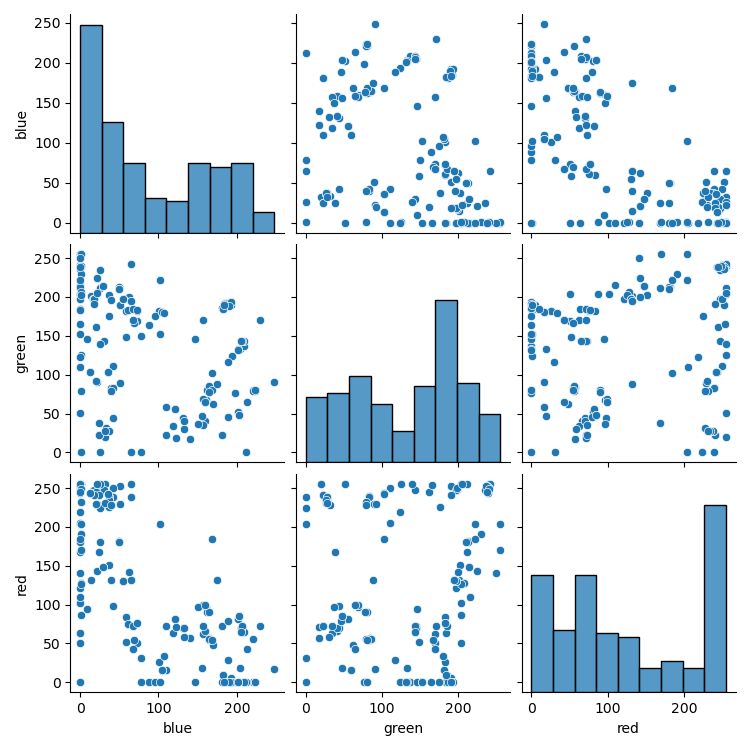

In [33]:
sb.pairplot(X_test)

In [30]:
df = pd.read_csv('./ph-data.csv')

<IPython.core.display.Javascript object>


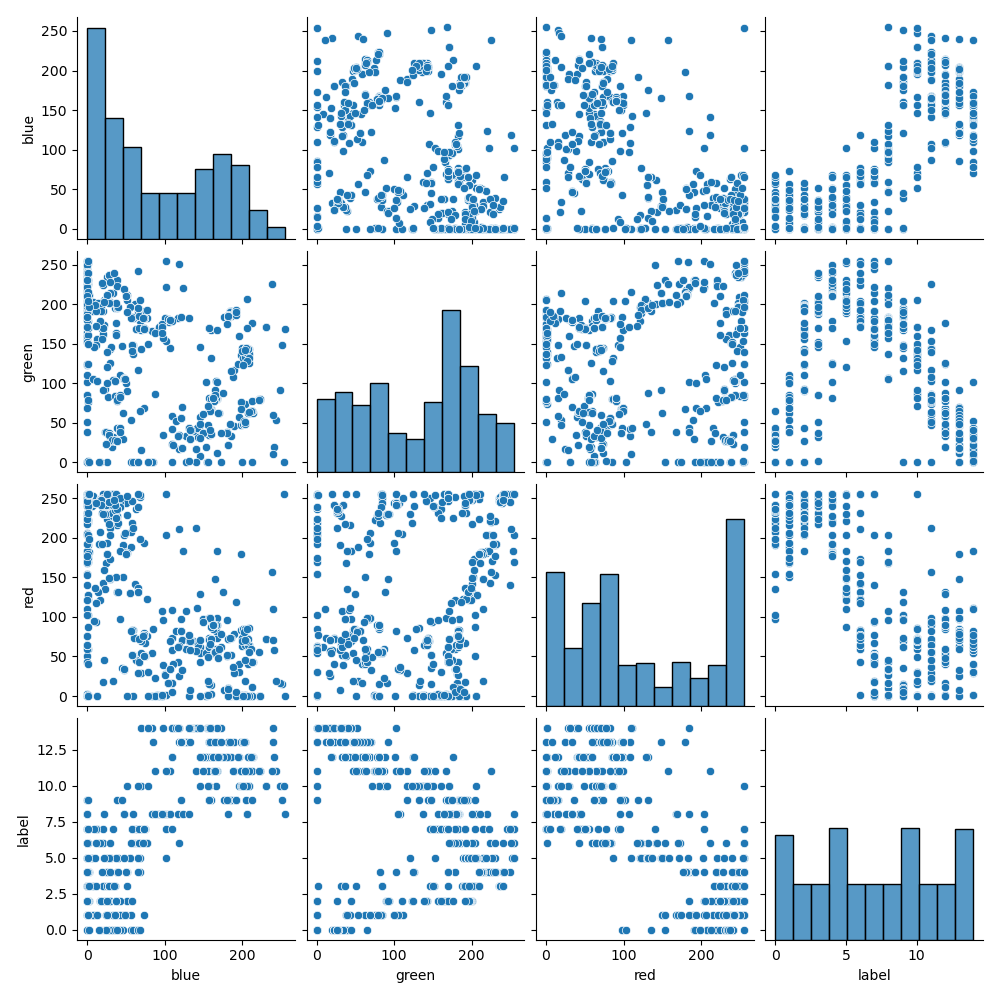

In [35]:
sb.pairplot(df)

<IPython.core.display.Javascript object>


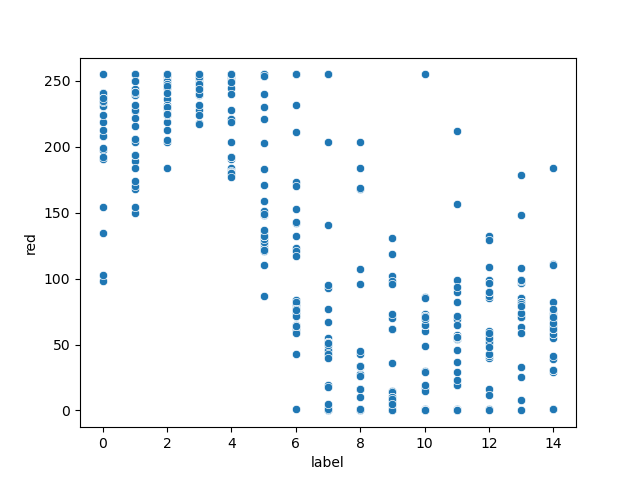

<AxesSubplot:xlabel='label', ylabel='red'>

In [36]:
sb.scatterplot(x=df.label, y=df.red)

<IPython.core.display.Javascript object>


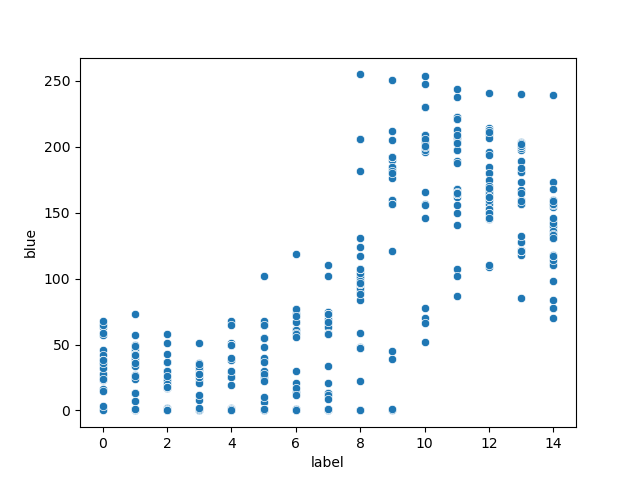

<AxesSubplot:xlabel='label', ylabel='blue'>

In [40]:
sb.scatterplot(x=df.label, y=df.blue)

<IPython.core.display.Javascript object>


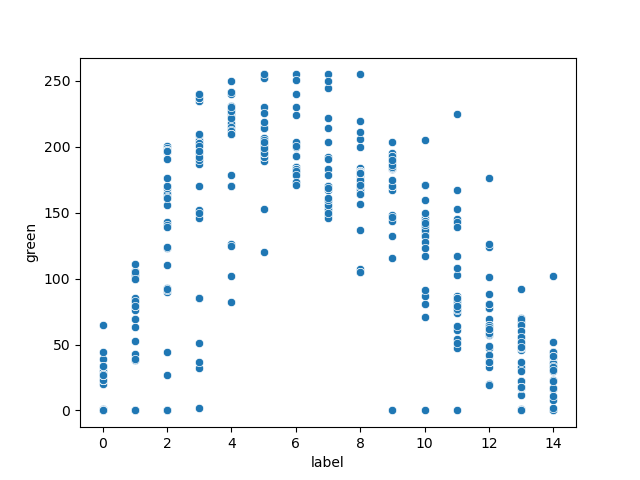

<AxesSubplot:xlabel='label', ylabel='green'>

In [41]:
sb.scatterplot(x=df.label, y=df.green)